THE SPARKS FOUNDATION MAY-2021

Task 2 : PREDICTION USING UNSUPERVISED LEARNING

Problem : To predict the optimum number of clusters and represent it visually. 

Done by : Arockia Alex Xavier Raj J

 Importing the libraries

In [75]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})


Uploading Dataset

In [39]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


Loading the iris dataset

In [62]:
data = p.read_csv('Iris.csv')
data.drop(['Id','Species'],axis=1,inplace=True)
print(data.head(7))
print(data.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
5            5.4           3.9            1.7           0.4
6            4.6           3.4            1.4           0.3
(150, 4)


Checking whether the Dataset contains missing values or not

In [63]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Summary of the Dataset

In [64]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Finding the optimum number of clusters for k-means classification

[680.8244, 152.36870647733906, 78.94084142614602, 57.345409315718165, 46.53558205128205, 38.93873974358974, 34.19068792479662, 29.905374299825105, 27.927882157034972, 25.95549708624709]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


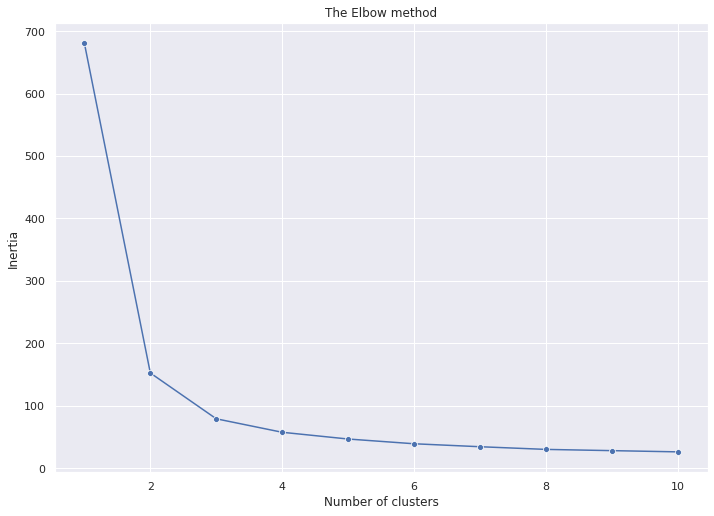

In [76]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
print(inertia)
# Plotting the results onto a line graph
sns.lineplot(range(1,11),inertia, marker = "o")
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

From the above lineplot we choose the number of clusters as 3.

In [78]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Visualizing the Clusters

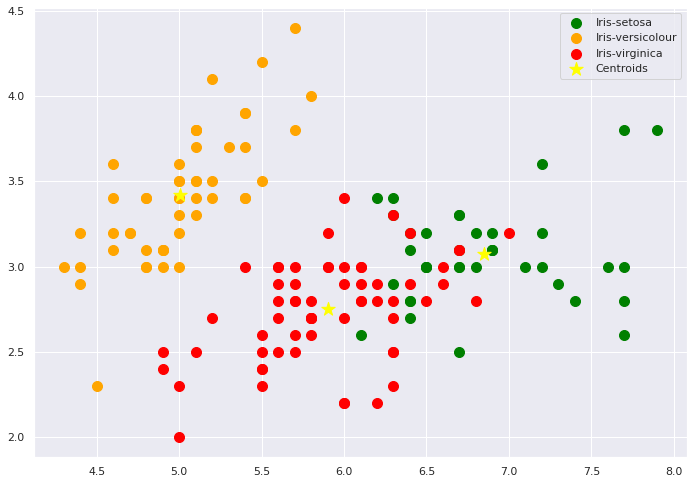

In [79]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'yellow', label = 'Centroids', marker='*')

plt.legend()